# Assignment 2

# set up

the first datasheet I am going to analyze is some details about tumour

In [985]:
# Necessary import
import pandas as pd

In [986]:
# Read in the data
tumour= pd.read_csv("sim_av_tumour.csv")
tumour.head()

C:\Users\apple\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (5,6,8,9,17,18,20,22,26,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,TUMOURID,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,...,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000003,10000003,2013-01-30,C449,C44,8090,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
3,10000004,10000004,2015-09-15,C449,C44,8090,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
4,10000005,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2


# about this table

In [987]:
tumour.shape

(1402817, 34)

This table contains 34 columns and 1402817 rows. And have a look at more information about this table.

In [988]:
tumour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402817 entries, 0 to 1402816
Data columns (total 34 columns):
TUMOURID                    1402817 non-null int64
PATIENTID                   1402817 non-null int64
DIAGNOSISDATEBEST           1402817 non-null object
SITE_ICD10_O2               1402303 non-null object
SITE_ICD10_O2_3CHAR         1402356 non-null object
MORPH_ICD10_O2              1402304 non-null object
BEHAVIOUR_ICD10_O2          1402410 non-null object
T_BEST                      653053 non-null object
N_BEST                      546397 non-null object
M_BEST                      535682 non-null object
STAGE_BEST                  1402801 non-null object
STAGE_BEST_SYSTEM           671840 non-null float64
GRADE                       1340030 non-null object
AGE                         1402817 non-null int64
SEX                         1402817 non-null int64
CREG_CODE                   1402817 non-null object
LINKNUMBER                  1402817 non-null int64
SCREENINGST

I want to know the exact bytes

In [989]:
tumour.memory_usage(deep=True).sum()

1607800047

# cleaning

How many missing values are there per column.

In [990]:
tumour.isnull().sum()

TUMOURID                          0
PATIENTID                         0
DIAGNOSISDATEBEST                 0
SITE_ICD10_O2                   514
SITE_ICD10_O2_3CHAR             461
MORPH_ICD10_O2                  513
BEHAVIOUR_ICD10_O2              407
T_BEST                       749764
N_BEST                       856420
M_BEST                       867135
STAGE_BEST                       16
STAGE_BEST_SYSTEM            730977
GRADE                         62787
AGE                               0
SEX                               0
CREG_CODE                         0
LINKNUMBER                        0
SCREENINGSTATUSFULL_CODE    1278256
ER_STATUS                   1279117
ER_SCORE                    1344907
PR_STATUS                   1323601
PR_SCORE                    1370032
HER2_STATUS                 1294783
CANCERCAREPLANINTENT         986954
PERFORMANCESTATUS           1021537
CNS                         1032895
ACE27                       1296493
GLEASON_PRIMARY             

It can be seen that the missing values of "STAGE_BEST" and "LATERALITY" are much smaller than others,so I drop rows that have any missing value of them first

In [991]:
tumour.dropna(subset=['STAGE_BEST','LATERALITY'],how='any',inplace=True)
tumour.shape

(1402766, 34)

THEN LOOK AT EACH COLUMN SEPARATELY

SEE WHAT THEY MEAN,IF I CAN DROP THEIR MISSING VALUES

"DIAGNOSISDATEBEST"

"DIAGNOSISDATEBEST"column which means the date on which the patient was first diagnosed with cancer (whether at its primary site or as a metastasis), expressed as DDMMYYYY.

In [992]:
tumour.DIAGNOSISDATEBEST.describe()

count        1402766
unique          1095
top       2013-05-07
freq            2205
Name: DIAGNOSISDATEBEST, dtype: object

change object to exclusive type (datatime 64[ns]) for later statistical analysis

In [993]:
tumour['DIAGNOSISDATEBEST']=pd.to_datetime(tumour.DIAGNOSISDATEBEST)

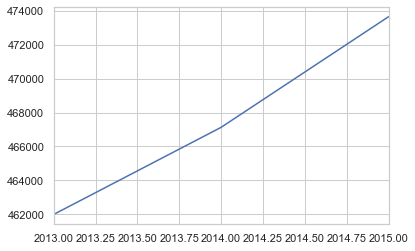

In [994]:
%matplotlib inline
tumour['year_diagnosis']=tumour.DIAGNOSISDATEBEST.dt.year
tumour.year_diagnosis.value_counts().sort_index().plot()

I want to see the frequency of per year.And we can see that being diagnosed with cancer increases every year.

"SITE_ICD10_O2"    "SITE_ICD10_O2_3CHAR"

"SITE_ICD10_O2"and "SITE_ICD10_O2_3CHAR":ICD defines the universe of diseases, disorders, injuries and other related health conditions
 "SITE_ICD10_O2_3CHAR" :general categories                                                               
 "SITE_ICD10_O2":breakdown of general categories("SITE_ICD10_O2_3CHAR")

so I drop rows that have any missing value of them 

In [995]:
tumour.dropna(subset=['SITE_ICD10_O2','SITE_ICD10_O2_3CHAR'],how='any',inplace=True)
tumour.shape

(1401957, 35)

"T_BEST"                     "N_BEST"                      "M_BEST"                       

In the TNM system:

The T refers to the size and extent of the main tumor. The main tumor is usually called the primary tumor.
The N refers to the the number of nearby lymph nodes that have cancer.
The M refers to whether the cancer has metastasized. This means that the cancer has spread from the primary tumor to other parts of the body.
When your cancer is described by the TNM system, there will be numbers after each letter that give more details about the cancer.

IS is not cancer, but it may become cancer.

so I drop rows that have any missing value of them

In [996]:
tumour.dropna(subset=['T_BEST','N_BEST','M_BEST'],how='any',inplace=True)
tumour.shape

(446144, 35)

Primary tumor (T)

TX: Main tumor cannot be measured.
T0: Main tumor cannot be found.
T1, T2, T3, T4: Refers to the size and/or extent of the main tumor. The higher the number after the T, the larger the tumor or the more it has grown into nearby tissues. T's may be further divided to provide more detail, such as T3a and T3b

In [997]:
tumour['T_BEST'].value_counts()

3      90250
2      75082
4      50269
1      38405
1c     30017
2a     27931
1a     27499
1b     23711
3a     16486
2c     15762
2b     11430
3b     10911
4b      9947
4a      8460
is      3163
a       2363
3c      1447
4d       529
1mi      524
1b1      496
0        408
1a1      267
4c       175
3d       148
1b2       88
1d        60
2a2       58
3s        49
1a2       44
X         33
2s        32
2d        28
2a1       24
IS        24
2A         9
T2         5
1B         3
4e         3
3/4        3
T3         1
Name: T_BEST, dtype: int64

so:1、drop some meaningless values{a , 1b1 ,1a1 ,1b2 ,2a2 , 1a2 , 2a1 }(maybe human error)                       

  2、change {2A , T2 ,1B, T3,is}to{2a , 2 , 1b ,3,IS}

In [998]:
tumour.drop(tumour[tumour.T_BEST=='a'].index,inplace=True)
tumour.drop(tumour[tumour.T_BEST=='1b1'].index,inplace=True)
tumour.drop(tumour[tumour.T_BEST=='1a1'].index,inplace=True)
tumour.drop(tumour[tumour.T_BEST=='1b2'].index,inplace=True)
tumour.drop(tumour[tumour.T_BEST=='2a2'].index,inplace=True)
tumour.drop(tumour[tumour.T_BEST=='1a2'].index,inplace=True)
tumour.drop(tumour[tumour.T_BEST=='2a1'].index,inplace=True)

In [999]:
tumour.replace('2A','2a',inplace=True)
tumour.replace('T2','2',inplace=True)
tumour.replace('1B','2b',inplace=True)
tumour.replace('T3','3',inplace=True)
tumour.replace('is','IS',inplace=True)

In [1000]:
tumour['T_BEST'].value_counts()

3      90251
2      75087
4      50269
1      38405
1c     30017
2a     27940
1a     27499
1b     23711
3a     16486
2c     15762
2b     11433
3b     10911
4b      9947
4a      8460
IS      3187
3c      1447
4d       529
1mi      524
0        408
4c       175
3d       148
1d        60
3s        49
X         33
2s        32
2d        28
3/4        3
4e         3
Name: T_BEST, dtype: int64

Regional lymph nodes (N)

NX: Cancer in nearby lymph nodes cannot be measured.
N0: There is no cancer in nearby lymph nodes.
N1, N2, N3: Refers to the number and location of lymph nodes that contain cancer. The higher the number after the N, the more lymph nodes that contain cancer.

In [1001]:
tumour['N_BEST'].value_counts()

0      278951
1       71754
2       48756
3       22345
1a       5459
2b       4362
2a       3062
1mi      2209
2c       1893
3a       1356
1b       1126
0.0       808
1c        284
3b        167
3c        125
X         124
N0          8
2B          5
1.0         5
4           2
2.0         2
+           1
Name: N_BEST, dtype: int64

so:1、drop some meaningless values{+, 4}(maybe human error)

2、change {0.0 , 1.0 ,2B, 2.0, NO }to{0 , 1 , 2b ,2, 0}

In [1002]:
tumour.drop(tumour[tumour.N_BEST=='4'].index,inplace=True)
tumour.drop(tumour[tumour.N_BEST=='+'].index,inplace=True)

In [1003]:
tumour.replace(0.0,'0',inplace=True)
tumour.replace(1.0,'1',inplace=True)
tumour.replace('2B','2b',inplace=True)
tumour.replace(2.0,'2',inplace=True)
tumour.replace('N0','0',inplace=True)

In [1004]:
tumour['N_BEST'].value_counts()

0      279767
1       71759
2       48758
3       22345
1a       5459
2b       4367
2a       3062
1mi      2209
2c       1893
3a       1356
1b       1126
1c        284
3b        167
3c        125
X         124
Name: N_BEST, dtype: int64

Distant metastasis (M)

MX: Metastasis cannot be measured.
M0: Cancer has not spread to other parts of the body.
M1: Cancer has spread to other parts of the body.

In [1005]:
tumour['M_BEST'].value_counts()

0     372909
1      35091
1b     23938
1a     10580
X        181
1c       101
2          1
Name: M_BEST, dtype: int64

so:1、drop some meaningless values{2}(maybe human error)

In [1006]:
tumour.drop(tumour[tumour.M_BEST=='2'].index,inplace=True)

In [1007]:
tumour['M_BEST'].value_counts()

0     372909
1      35091
1b     23938
1a     10580
X        181
1c       101
Name: M_BEST, dtype: int64

"STAGE_BEST"                      
"STAGE_BEST_SYSTEM"            

In [1008]:
tumour['STAGE_BEST'].value_counts()

4      74289
1      72102
3      57038
2      56295
1A     46942
2b     37102
2a     31075
3A     24163
3B     15619
4A      9445
3C      5735
?       3420
0       3281
U       2257
4B      1917
2C       820
4C       627
1C       285
0A        64
4S        58
1A1       41
3S        34
1B1       32
1S        29
1E        28
2S        23
2A1       16
2A2       15
1A2       15
0IS       13
2E         9
3E         6
1B2        5
Name: STAGE_BEST, dtype: int64

so:1、drop some meaningless values{?, U ,1A1,1B1,1A2,2A2,2A1,1B2}(maybe human error)

2、change {2b , 2a ,0IS}to{2B , 2A , 0 }

In [1009]:
tumour.drop(tumour[tumour.STAGE_BEST=='?'].index,inplace=True)
tumour.drop(tumour[tumour.STAGE_BEST=='U'].index,inplace=True)
tumour.drop(tumour[tumour.STAGE_BEST=='1A1'].index,inplace=True)
tumour.drop(tumour[tumour.STAGE_BEST=='1B1'].index,inplace=True)
tumour.drop(tumour[tumour.STAGE_BEST=='1A2'].index,inplace=True)
tumour.drop(tumour[tumour.STAGE_BEST=='2A2'].index,inplace=True)
tumour.drop(tumour[tumour.STAGE_BEST=='2A1'].index,inplace=True)
tumour.drop(tumour[tumour.STAGE_BEST=='1B2'].index,inplace=True)

In [1010]:
tumour.replace('2b','2B',inplace=True)
tumour.replace('2a','2A',inplace=True)
tumour.replace('0IS','0',inplace=True)

In [1011]:
tumour['STAGE_BEST'].value_counts()

4     74289
1     72102
3     57038
2     56295
1A    46942
2B    37102
2A    31075
3A    24163
3B    15619
4A     9445
3C     5735
0      3294
4B     1917
2C      820
4C      627
1C      285
0A       64
4S       58
3S       34
1S       29
1E       28
2S       23
2E        9
3E        6
Name: STAGE_BEST, dtype: int64

In [1012]:
tumour['STAGE_BEST_SYSTEM'].value_counts()

22.0    302804
20.0     63690
23.0     15267
21.0      1279
24.0       198
7.0         63
5.0         30
Name: STAGE_BEST_SYSTEM, dtype: int64

"GRADE" 

If a grading system for a tumor type is not specified, the following system is generally used :

GX: Grade cannot be assessed (undetermined grade)
G1: Well differentiated (low grade)
G2: Moderately differentiated (intermediate grade)
G3: Poorly differentiated (high grade)
G4: Undifferentiated (high grade)

In [1013]:
tumour['GRADE'].value_counts()

GX    157113
G2    130563
G3    107278
G1     25607
G4      8811
Name: GRADE, dtype: int64

"ER_STATUS"                   
"ER_SCORE"                    
"PR_STATUS"                   
"PR_SCORE"                    
"HER2_STATUS"                

Hormone receptor studies such as ER, PR, and HER2/neu are routinely done in breast carcinoma. It not only helps in the prognosis of the tumor but also helps in deciding its treatment. The goal of doing this receptor status is to provide right treatment to the right patient.

In [1014]:
tumour['ER_STATUS'].value_counts()

P     49233
N      8526
U      6690
Pm      241
X       103
B        39
Name: ER_STATUS, dtype: int64

In [1015]:
tumour['ER_SCORE'].value_counts()

8.0    21779
0       3681
7.0     2775
6.0      846
5.0      478
4.0      419
3.0      384
2        340
1          7
Name: ER_SCORE, dtype: int64

In [1016]:
tumour.ER_SCORE.value_counts().index

Index([8.0, '0', 7.0, 6.0, 5.0, 4.0, 3.0, '2', '1'], dtype='object')

In [1017]:
tumour['ER_SCORE'] = tumour['ER_SCORE'].map(float)

In [1018]:
tumour.ER_SCORE.value_counts().index

Float64Index([8.0, 0.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0], dtype='float64')

I changed value type in "ER_SCORE" .

In [1019]:
tumour['PR_STATUS'].value_counts()

P     25591
N     11474
U      4891
X      1310
Pm      265
B        61
Name: PR_STATUS, dtype: int64

In [1020]:
tumour['PR_SCORE'].value_counts()

8.0    6479
0      4707
7.0    2277
6.0    1442
5.0    1136
4.0     899
3.0     568
2       395
1        18
Name: PR_SCORE, dtype: int64

In [1021]:
tumour.PR_SCORE.value_counts().index

Index([8.0, '0', 7.0, 6.0, 5.0, 4.0, 3.0, '2', '1'], dtype='object')

In [1022]:
tumour['PR_SCORE'] = tumour['PR_SCORE'].map(float)

In [1023]:
tumour.PR_SCORE.value_counts().index

Float64Index([8.0, 0.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0], dtype='float64')

I have changed value type in "ER_SCORE" 

In [1024]:
tumour['HER2_STATUS'].value_counts()

N     47857
P      7969
B      2415
X       186
Pm      170
Name: HER2_STATUS, dtype: int64

"CANCERCAREPLANINTENT"        

The intention of a Cancer Care Plan developed within a Cancer Care Spell.
National Codes:

C	Curative
P	Palliative anti-cancer
S	Supportive 
N	No specific cancer treatment 
Z	Non-Curative
X	No active treatment

In [1025]:
tumour['CANCERCAREPLANINTENT'].value_counts()

C     115032
Z      41248
9      28976
X       8229
Cm      2401
Zm       461
Name: CANCERCAREPLANINTENT, dtype: int64

"PERFORMANCESTATUS"          

A World Health Organisation classification indicating a PERSON's status relating to activity/DISABILITY.

In [1026]:
tumour['PERFORMANCESTATUS'].value_counts()

0     69880
9     40231
1     38656
2     18415
3     13294
4      3835
1m     1906
2m     1141
3m      632
4m      150
Name: PERFORMANCESTATUS, dtype: int64

"ACE27"

The PERSON SCORE recorded during a Cancer Care Spell, where the ASSESSMENT TOOL TYPE is 'Adult Comorbidity Evaluation - 27'.

National Codes:

0	None
1	Mild
2	Moderate
3	Severe

In [1027]:
tumour['ACE27'].value_counts()

9     23535
0     10152
1      6162
2      4022
3      3946
3m      160
1m      108
2m       83
Name: ACE27, dtype: int64

"GLEASON_PRIMARY"            
"GLEASON_SECONDARY"           
"GLEASON_TERTIARY"            
"GLEASON_COMBINED"           

The Gleason Grading System is used to help evaluate the prognosis of men with prostate cancer.

A pathologist assigns a GLEASON GRADE to the most common Tumour pattern in a Biopsy specimen (Primary Grade) then the second most common (Secondary Grade). The grades are added together to give the Gleason Score.


In [1028]:
tumour['GLEASON_PRIMARY'].value_counts()

3.0    21672
4.0    12994
5.0     1642
2         15
1          1
Name: GLEASON_PRIMARY, dtype: int64

In [1029]:
tumour['GLEASON_SECONDARY'].value_counts()

4.0    8765
3.0    8759
2      2150
5.0    1581
Name: GLEASON_SECONDARY, dtype: int64

In [1030]:
tumour['GLEASON_COMBINED'].value_counts()

7.0     9997
6.0     7246
8.0     2313
9.0     1386
5.0      310
10.0      47
4.0        7
Name: GLEASON_COMBINED, dtype: int64

Sometimes pathologists will also give a grade to a third component of the specimen (Tertiary Grade) although this is recorded separately and is not added to the score.


In [1031]:
tumour['GLEASON_TERTIARY'].value_counts()

5.0    330
4.0     90
3.0     65
Name: GLEASON_TERTIARY, dtype: int64

This data are relatively small ,and considering that it is  recorded separately and is not added to the score,I am going to drop this column.

In [1032]:
tumour.drop('GLEASON_TERTIARY',axis=1,inplace=True)

"DATE_FIRST_SURGERY"

In [1033]:
tumour.DATE_FIRST_SURGERY.describe()

count         289227
unique          1478
top       2014-04-29
freq             409
Name: DATE_FIRST_SURGERY, dtype: object

change object to exclusive type (datatime 64[ns]) for later statistical analysis

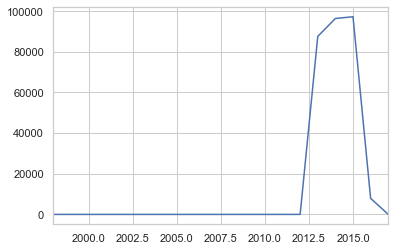

In [1034]:
tumour['DATE_FIRST_SURGERY']=pd.to_datetime(tumour.DATE_FIRST_SURGERY)
tumour['year_firstsurgery']=tumour.DATE_FIRST_SURGERY.dt.year
tumour.year_firstsurgery.value_counts().sort_index().plot()

I want to see the frequency of per year.And we can see that 2014 saw the most surgeries(just as describe() shows)

"LATERALITY" 

An indication of the:

side of the body for a Tumour relating to paired organs within a PATIENT or
radiologically determined laterality of the Lesion(s).
National Codes:

L	Left
R	Right
M	Midline
B	Bilateral

In [1035]:
tumour['LATERALITY'].value_counts()

8    188848
R     97359
L     89186
8     52946
9      7847
B       629
M       184
Name: LATERALITY, dtype: int64

there are two '8',let's see why

In [1036]:
tumour['LATERALITY'].value_counts().index

Index(['8', 'R', 'L', 8, '9', 'B', 'M'], dtype='object')

so I am going to drop value{8} (btw:all value{9 or 99} in this table means not known)

In [1037]:
tumour.drop(tumour[tumour.LATERALITY=='8'].index,inplace=True)
tumour.drop(tumour[tumour.LATERALITY==8].index,inplace=True)

In [1038]:
tumour['LATERALITY'].value_counts()

R    97359
L    89186
9     7847
B      629
M      184
Name: LATERALITY, dtype: int64

"QUINTILE_2015" 

In [1039]:
tumour['QUINTILE_2015'].value_counts()

2                     40670
3                     39705
1 - least deprived    38432
5 - most deprived     38403
4                     37995
Name: QUINTILE_2015, dtype: int64

if there any duplicate rows(I guess none,but let's check)

In [1040]:
tumour.duplicated().sum()

0

Have a look at this table after cleaning

In [1041]:
tumour.head()

,TUMOURID,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,...,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015,year_diagnosis,year_firstsurgery
79,10000082,10000082,2014-11-07,C443,C44,8070,3,2,0,0,...,Y1,NaN,NaN,NaN,NaN,2014-11-07,R,1 - least deprived,2014,2014.0
86,10000089,10000089,2015-03-16,C447,C44,8070,3,1,0,0,...,99,NaN,NaN,NaN,NaN,2015-04-24,L,2,2015,2015.0
165,10000168,10000168,2015-05-24,C442,C44,8070,3,2,0,0,...,NI,1,NaN,NaN,NaN,2015-05-27,L,1 - least deprived,2015,2015.0
334,10000340,10000340,2014-09-05,C446,C44,8090,3,1,0,0,...,NaN,NaN,NaN,NaN,NaN,2014-09-05,R,3,2014,2014.0
635,10000645,10000645,2015-02-17,C443,C44,8070,3,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaT,R,4,2015,NaN


In [1042]:
tumour.shape

(195205, 35)

I have dropped the column"GLEASON_TERTIARY" and added column "year_diagnosis" and "year_firstsurgery"

# analyze（statistical analysis+graphs）some other missing values in specific colunmns I am going to handle in analysis.

In [1043]:
#%matplotlib inline(already be imputed previously)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

what is the latest time of first_surgery and diagnosis_best?

In [1044]:
tumour.DATE_FIRST_SURGERY.max()

Timestamp('2017-03-03 00:00:00')

In [1045]:
tumour.DIAGNOSISDATEBEST.max()

Timestamp('2015-12-31 00:00:00')

how many days from the oldest first_surgery day and diagnosis_best?

In [1046]:
(tumour.DATE_FIRST_SURGERY.max()-tumour.DATE_FIRST_SURGERY.min()).days

1718

In [1047]:
(tumour.DIAGNOSISDATEBEST.max()-tumour.DIAGNOSISDATEBEST.min()).days

1094

I want to see what is the distribution of age

In [1048]:
tumour['AGE']=tumour['AGE'].astype(int)

In [1049]:
tumour.AGE.describe()

count    195205.000000
mean         66.472775
std          14.415679
min           0.000000
25%          57.000000
50%          68.000000
75%          77.000000
max         105.000000
Name: AGE, dtype: float64

In [1050]:
age_max = tumour['AGE'].max()
print("the oldest age is:%d"%age_max)

the oldest age is:105


Text(0.5, 0, 'AGE')

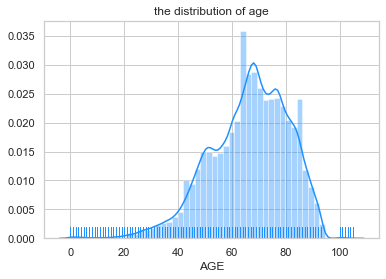

In [1051]:
g1=sns.distplot(tumour['AGE'],rug=True,color='#1E90FF')
g1.set_title('the distribution of age')
plt.xlabel('AGE')

and what is the distribution of sex

In [1052]:
tumour.SEX.describe()

count     195205
unique         2
top            2
freq      130442
Name: SEX, dtype: object

In [1053]:
male=tumour[tumour['SEX']=='1'].shape[0]
print("total numbel of male:%d"%male )

total numbel of male:64763


In [1054]:
female=tumour[tumour['SEX']=='2'].shape[0]
print("total numbel of female:%d"%female )

total numbel of female:130442


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A64C09D30>],
      dtype=object)

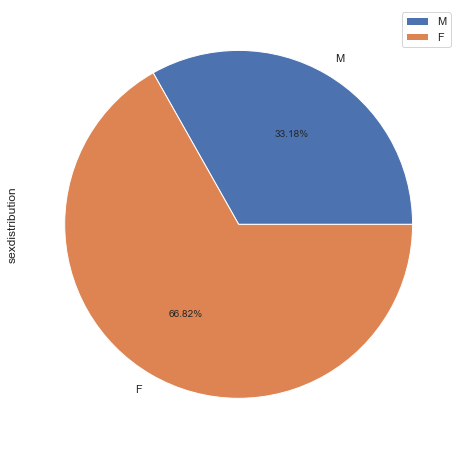

In [1055]:
sex=pd.DataFrame([64763,130442],index=['M','F'],columns=['sexdistribution'])
sex.plot(kind='pie',subplots=True,figsize=(8,8),autopct='%1.2f%%')

what is the distribution of side of body for tumour(laterality)?

In [1056]:
tumour['LATERALITY'].value_counts()

R    97359
L    89186
9     7847
B      629
M      184
Name: LATERALITY, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028AA10BA940>],
      dtype=object)

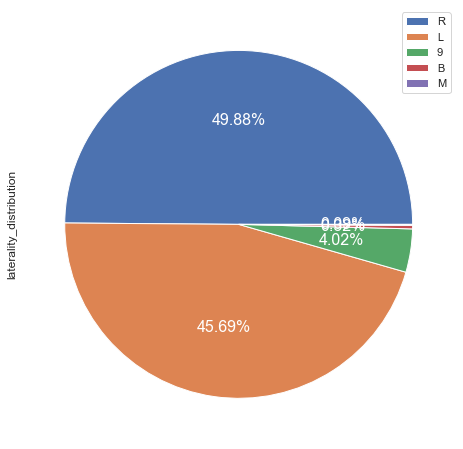

In [1057]:
laterality=pd.DataFrame([97359,89186,7847,629,184],index=['R','L','9','B','M'],columns=['laterality_distribution'])
laterality.plot(kind='pie',subplots=True,figsize=(8,8),textprops={'fontsize': 16, 'color':'w'},autopct='%1.2f%%')

most of patients' tumours are in the body of right or left.few patients' tumours are in the middle or both sides of the body.

Is there any connection between age and sex?

(btw:I don't drop AGE==0,because I think it refers to infants)

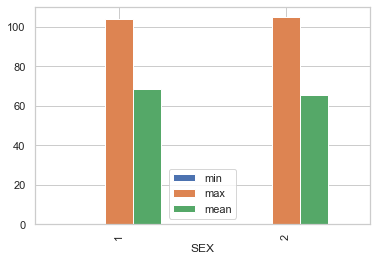

In [1058]:
sex_difference = tumour.groupby('SEX')['AGE'].agg(['min','max','mean'])
sex_difference.plot(kind='bar')

male and female patients' age difference is not significant

what is the relationship between sex and the type of tumour(grade)?

In [1059]:
tumour.GRADE.describe()

count     190603
unique         5
top           GX
freq       78863
Name: GRADE, dtype: object

grading systems differ depending on the type of cancer                                                       
so:
sort GRADE by its meaning:GX<G1<G2<G3<G4

In [1060]:
tumour['GRADE']=tumour.GRADE.astype('category',categories=['GX','G1','G2','G3','G4'],ordered=True)

C:\Users\apple\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


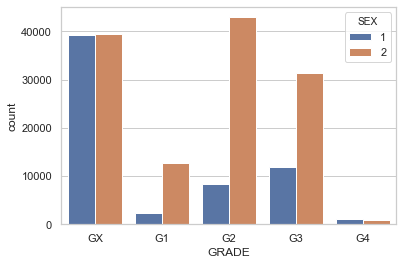

In [1061]:
g3=sns.countplot(x='GRADE',hue='SEX',data=tumour)
g3

majority of male patients' tumours cannot be assessed and majority of female patients' tumours are moderately differentiated.Very few patients' tumours spead faster and grow rapidly.

I want to understand the meaning of gleason system.

Text(0, 0.5, 'Secondary_Grade')

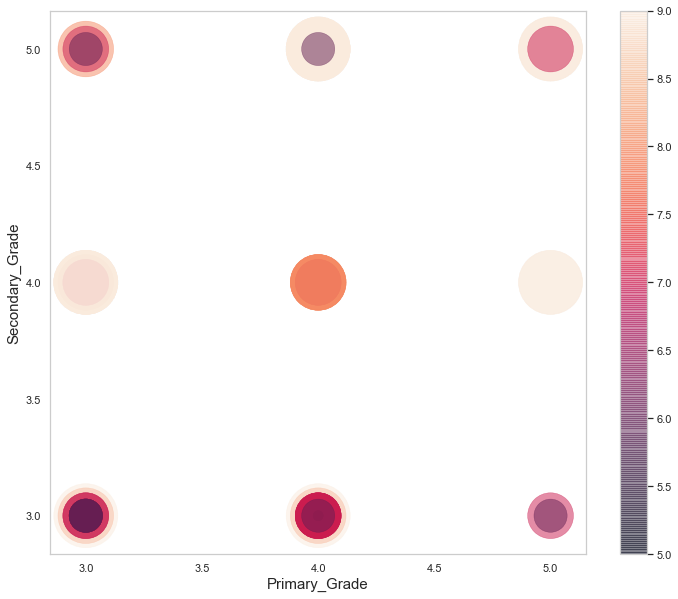

In [1062]:
sns.set(style='whitegrid')
x=tumour.GLEASON_PRIMARY
y=tumour.GLEASON_SECONDARY
z=tumour.GLEASON_COMBINED
fig,ax=plt.subplots(figsize=(12,10))
bubble=ax.scatter(x,y,s=(z-np.min(z)+0.1)*1000,c=z,linewidth=0.5,alpha=0.5)
ax.grid()
fig.colorbar(bubble)   
ax.set_xlabel('Primary_Grade',fontsize=15)
ax.set_ylabel('Secondary_Grade',fontsize=15)

The Gleason score of each area is 1~5, and the Gleason score is the sum of the Gleason score of the primary and secondary areas to form the cancer grading constant. Its characteristics can be summarized as follows :1 grading principle (growth mode),2 aspects (main growth mode and secondary growth mode),5 grading system (grade 1-5 grading of gland differentiation),10 points (the least differentiated is 5+5=10).

If there are connections between the score of PR ER HER2

In [1063]:
tumour['ER_SCORE'].value_counts(dropna=False)

NaN    164673
8.0     21653
0.0      3656
7.0      2763
6.0       840
5.0       475
4.0       419
3.0       381
2.0       338
1.0         7
Name: ER_SCORE, dtype: int64

In [1064]:
tumour['ER_SCORE'].fillna(value=9.0,inplace=True)

In [1065]:
tumour['PR_SCORE'].fillna(value=9.0,inplace=True)

In [1066]:
tumour['PR_SCORE'].value_counts().index

Float64Index([9.0, 8.0, 0.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0], dtype='float64')

Text(0, 0.5, 'ER')

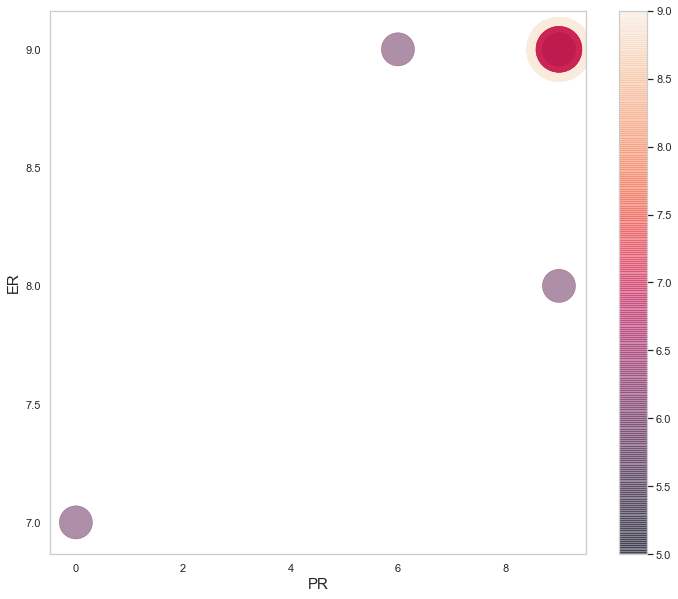

In [1067]:
sns.set(style='whitegrid')
x1=tumour.PR_SCORE
y1=tumour.ER_SCORE
z1=tumour.GLEASON_COMBINED
fig,ax=plt.subplots(figsize=(12,10))
bubble=ax.scatter(x1,y1,s=(z1-np.min(z1)+0.1)*1000,c=z1,linewidth=0.5,alpha=0.5)
ax.grid()
fig.colorbar(bubble)   
ax.set_xlabel('PR',fontsize=15)
ax.set_ylabel('ER',fontsize=15)

Is there relationship between age ,sex and incidence?

In [1068]:
tumour.ACE27.value_counts().index

Index(['9', '0', '1', '2', '3', '3m', '1m', '2m'], dtype='object')

9 means unknow,m means minus,so just take representative values.

In [1069]:
tumour2=tumour.loc[(tumour['ACE27']=='0')|(tumour['ACE27']=='1')|(tumour['ACE27']=='2')|(tumour['ACE27']=='3')]

In [1070]:
tumour2['ACE27']=pd.to_numeric(tumour2['ACE27'])

C:\Users\apple\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1071]:
tumour2.ACE27.value_counts().index

Int64Index([0, 1, 2, 3], dtype='int64')

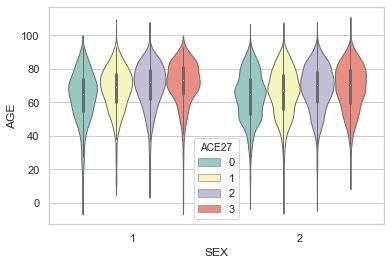

In [1072]:
sns.violinplot(x=tumour2['SEX'],y=tumour2['AGE'],hue = tumour2['ACE27'],linewidth=1,palette='Set3')

Is there any relationship between the patients' stage sex and age?

In [1073]:
tumour.PERFORMANCESTATUS.value_counts().index

Index(['0', '1', '9', '2', '3', '4', '1m', '2m', '3m', '4m'], dtype='object')

0:normal activity 1:cares for self 2:occasional assistance 3:nursing care needed 4:bedridden

9 means unknow,m means minus,so just take representative values.

In [1074]:
tumour3=tumour.loc[(tumour['PERFORMANCESTATUS']=='0')|(tumour['PERFORMANCESTATUS']=='1')|(tumour['PERFORMANCESTATUS']=='2')|(tumour['PERFORMANCESTATUS']=='3')|(tumour['PERFORMANCESTATUS']=='4')]

In [1075]:
tumour3['PERFORMANCESTATUS']=pd.to_numeric(tumour3['PERFORMANCESTATUS'])

C:\Users\apple\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


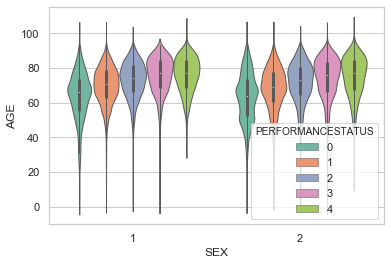

In [1076]:
sns.violinplot(x=tumour3['SEX'],y=tumour3['AGE'],hue = tumour3['PERFORMANCESTATUS'],linewidth=1,palette='Set2')

know more about status of ER PR HER2

In [1077]:
tumour['PR_STATUS'].fillna(value='M',inplace=True)
tumour['ER_STATUS'].fillna(value='M',inplace=True)
tumour['HER2_STATUS'].fillna(value='M',inplace=True)

In [1078]:
tumour.drop(tumour[tumour.PR_STATUS=='U'].index,inplace=True)
tumour.drop(tumour[tumour.ER_STATUS=='U'].index,inplace=True)

In [1079]:
tumour['ER_STATUS'].value_counts()

M     130852
P      48585
N       8397
Pm       235
X         91
B         30
Name: ER_STATUS, dtype: int64

In [1080]:
tumour['PR_STATUS'].value_counts()

M     150129
P      25355
N      11242
X       1139
Pm       264
B         61
Name: PR_STATUS, dtype: int64

In [1081]:
tumour['HER2_STATUS'].value_counts()

M     136061
N      42510
P       7105
B       2188
X        176
Pm       150
Name: HER2_STATUS, dtype: int64

In [1082]:
data=[['M',130852,150129,136061],['P',48585,25355,7105],['N',8397,11242,42510],['Pm',235,264,150],['B',30,61,2188],['X',91,1139,176]]
tumour4=pd.DataFrame(data,columns=['Index','ER','PR','HER2'])
tumour5=tumour4.set_index('Index')
tumour5

,ER,PR,HER2
Index,,,
M,130852,150129,136061
P,48585,25355,7105
N,8397,11242,42510
Pm,235,264,150
B,30,61,2188
X,91,1139,176


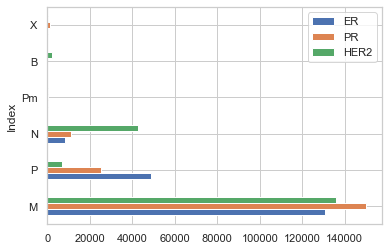

In [1083]:
tumour5.plot(kind='barh')

M means missing values,so we can see there are a lot of missing values.But why?

When the cells become cancerous, some and all of ER and PR are missing. 
If the cell still retains ER and/or PR, the growth and proliferation of the breast cancer cell is still regulated by endocrine; 

If ER and/or PR is absent, the growth of the breast cancer cell And proliferation is no longer regulated by endocrine, called non-hormone-dependent breast cancer.

And if the cancer tests negative for over-expression of the her2, weekly chemotherapy is an effective option with acceptable side effects.

# reflect and hypothesise

Every member in our group was assigned different analysis tasks in terms of drugs, types of tumours, relatinship of medical theoretical data and so on in order to avoid duplication of effort.

When I was doing the above analysis,I already made comments aside about the basic information of the table,the meaning of each column,and the possible connection between each column.                                                       
 
The number of peopleb diagnosed with cancer increases every year,and most of them were in their 60s and 70s,and women were over represented(66.82%).However,some lived to be over a hundred though they had cancer.Male patients' tumours were more likely to not be assessed while female patients' tumours are moderately differentiated. 

In gleason system,if only two modes are seen, the score for the first number is the primary score for the tumor and the second number is the medium score. If you see three patterns, the score for the first number will be the primary grade and the highest number of patterns for the second grade.

There is no significant difference between male and female in incidence rate(ACE27) and the state at the time(PERFORMANCESTATUS),and as the age increases, these indexes will rise.But there are also some abnormal values that do not match.

ER PR HER2 can reflect the control of tumors.But I still don't understand some meanings about these data.

Our group already read some paper about cancer and tumour,but there still have data we cannot explain ,so we are going to email the data owner and ask some questions.And we will study some algorithms for assignment3, 